In [1]:
import numpy as np
import pandas as pd
import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

In [2]:
train_df = pd.read_csv('./data/fl_2022_LastName_train.csv.gz')
val_df = pd.read_csv('./data/fl_2022_LastName_val.csv.gz')
test_df = pd.read_csv('./data/fl_2022_LastName_test.csv.gz')

In [3]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(845316, 9)
(105664, 9)
(105665, 9)


In [4]:
train_df = train_df.dropna()
val_df = val_df.dropna()
test_df = test_df.dropna()

In [5]:
train_df.head()

,name_last,asian,hispanic,nh_black,nh_white,other,total_n,race,race_code
0,Neaman-Piotrowicz,0.0,0.0,0.0,1.000000,0.000000,1.0,nh_white,3
1,Chaet,0.0,0.0,0.0,1.000000,0.000000,13.0,nh_white,3
2,Veloz Perez,0.0,1.0,0.0,0.000000,0.000000,1.0,hispanic,1
3,Spalter,0.0,0.0,0.0,0.928571,0.071429,42.0,nh_white,3
4,Kearns-Edwards,0.0,0.0,0.0,1.000000,0.000000,1.0,nh_white,3


## Extract features

In [6]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 2), min_df=50, lowercase=False)

In [7]:
X_train = vectorizer.fit_transform(train_df['name_last'])
X_val = vectorizer.transform(val_df['name_last'])
X_test = vectorizer.transform(test_df['name_last'])

In [8]:
X_train.shape

(845316, 1066)

In [9]:
X_val.shape

(105664, 1066)

In [10]:
X_test.shape

(105664, 1066)

In [11]:
vectorizer.get_feature_names_out()

array([' ', ' -', ' A', ..., 'zw', 'zy', 'zz'], dtype=object)

In [12]:
len(vectorizer.get_feature_names_out())

1066

In [13]:
vocab = vectorizer.get_feature_names_out()

In [17]:
y_train = train_df.race_code
y_val = val_df.race_code
y_test = test_df.race_code

In [18]:
y_train[0]

3

In [19]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(criterion = 'entropy', random_state=42, verbose=6, n_jobs=-1)

In [20]:
print(X_train.shape)
print(X_test.shape)

(845316, 1066)
(105664, 1066)


## Training

In [21]:
%%time

clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed: 20.8min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=-1)]: Done  98 out of 100 | elapsed: 68.4min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 68.7min finished


CPU times: user 5h 27min 46s, sys: 6min 56s, total: 5h 34min 42s
Wall time: 1h 8min 46s


RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=42,
                       verbose=6)

In [22]:
%%time
y_pred = clf.predict(X_val)
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:", metrics.accuracy_score(y_val, y_pred))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  1.2min


Test Accuracy: 0.7865308903694731
CPU times: user 3min 44s, sys: 11 s, total: 3min 55s
Wall time: 1min 29s


[Parallel(n_jobs=10)]: Done  98 out of 100 | elapsed:  1.5min remaining:    1.8s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:  1.5min finished


In [23]:
%%time
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    1.8s
[Parallel(n_jobs=10)]: Done  98 out of 100 | elapsed:    3.6s remaining:    0.1s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    3.7s finished


Test Accuracy: 0.7829913688673531
CPU times: user 15.8 s, sys: 40.1 ms, total: 15.8 s
Wall time: 4.25 s


In [24]:
joblib.dump(vectorizer, "models/rf_vec_lastname.joblib", compress=3)  # compression is ON!

['models/rf_vec_lastname.joblib']

In [25]:
joblib.dump(clf, "models/rf_model_lastname.joblib", compress=3)  # compression is ON!

['models/rf_model_lastname.joblib']

## Confusion Matrix

In [26]:
race_id_df = train_df[['race', 'race_code']].drop_duplicates().sort_values('race_code')
race_to_id = dict(race_id_df.values)

In [27]:
race_to_id

{'asian': 0, 'hispanic': 1, 'nh_black': 2, 'nh_white': 3, 'other': 4}

In [28]:
id_to_race = dict(race_id_df[['race_code', 'race']].values)

In [29]:
id_to_race

{0: 'asian', 1: 'hispanic', 2: 'nh_black', 3: 'nh_white', 4: 'other'}

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done  98 out of 100 | elapsed:    5.1s remaining:    0.1s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    5.1s finished


              precision    recall  f1-score   support

       asian       0.62      0.17      0.26      3648
    hispanic       0.86      0.83      0.85     32461
    nh_black       0.69      0.26      0.38     10403
    nh_white       0.76      0.93      0.83     56262
       other       0.30      0.01      0.03      2890

    accuracy                           0.78    105664
   macro avg       0.65      0.44      0.47    105664
weighted avg       0.76      0.78      0.75    105664



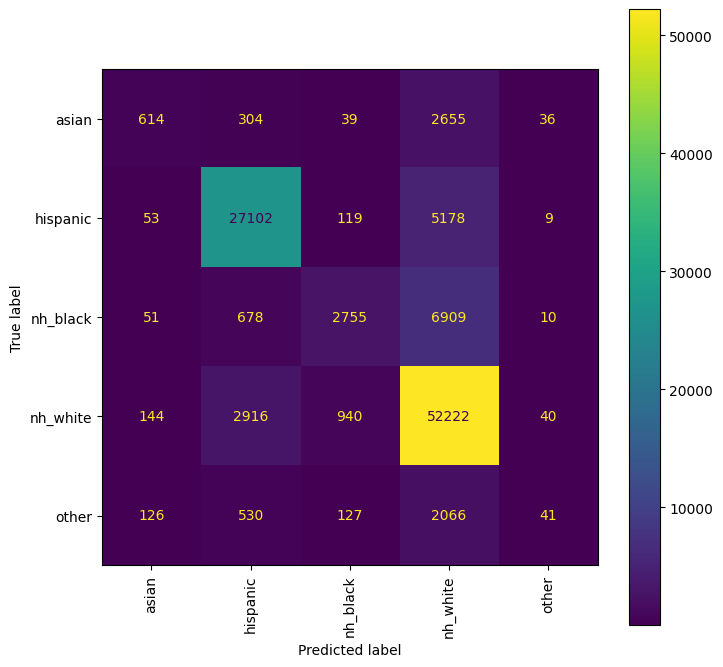

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline  

model_1m = joblib.load('models/rf_model_lastname.joblib')
preds = model_1m.predict(X_test)
predicted = [id_to_race[p] for p in preds]
actual = [id_to_race[p] for p in y_test.values]

print(classification_report(actual, predicted))

cm = confusion_matrix(actual, predicted, labels=list(race_to_id.keys()))
cmp = ConfusionMatrixDisplay(cm, display_labels=list(race_to_id.keys()))
fig, ax = plt.subplots(figsize=(8,8))
cmp.plot(ax=ax, xticks_rotation='vertical')

In [31]:
for class_id in id_to_race:
    correct = np.sum((y_test == class_id) & (preds == class_id))
    total = np.sum(y_test == class_id)
    print(f'Accuracy for class {id_to_race[class_id]}: {correct / total:.2f}')

Accuracy for class asian: 0.17
Accuracy for class hispanic: 0.83
Accuracy for class nh_black: 0.26
Accuracy for class nh_white: 0.93
Accuracy for class other: 0.01


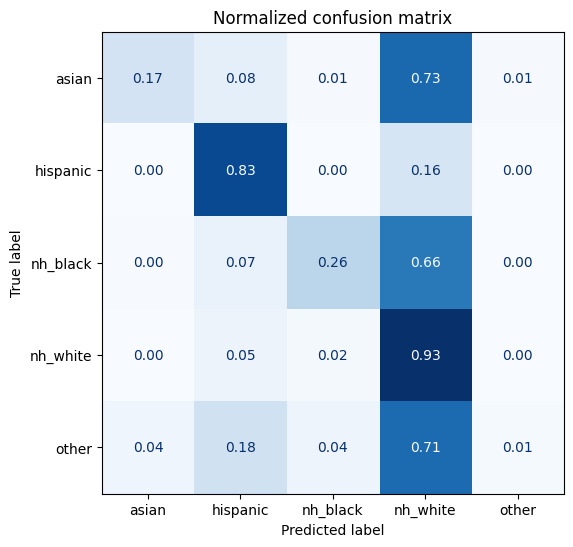

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

#y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(predicted, actual, list(race_to_id.keys()))